9


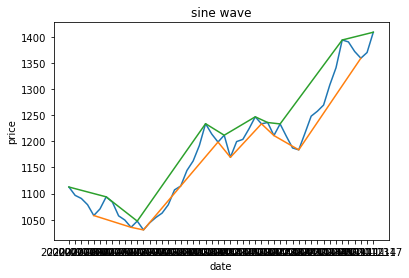

c:\users\686388\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='CH_TIMESTAMP'>

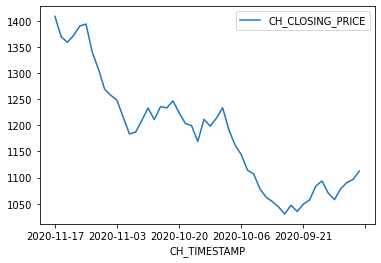

In [20]:
from matplotlib import pyplot as plt
import numpy as np;
import pandas as pd
import requests as req;
from pprint import pprint;
import math #needed for definition of pi


head = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36",
}

req = req.Session()
req.get('https://www.nseindia.com',headers=head)
# req.get('https://www.nseindia.com',headers=head)


def get_historic_data(stock):
    params = {
        'symbol':stock,
        'series':'["EQ"]',
        'from': '17-11-2019',
        'to': '17-11-2020'    
    }
    data = req.get('https://www.nseindia.com/api/historical/cm/equity',params = params,headers = head)
    
    # pprint(data.json())
    return data.json()['data']

historic_data = get_historic_data('HDFCBANK')

df = pd.DataFrame(historic_data)  
# x = np.arange(0, 5*1, 1)
# y = ['2020-11-17','2020-11-16','2020-11-15','2020-11-14','2020-11-13']

x= df['CH_TIMESTAMP'][::-1]
y= df['CH_CLOSING_PRICE'][::-1]


mapping = list(zip(x,y))

mx = []  
mn = []  
  
    # Checking whether the first point is  
    # local maxima or minima or neither  
if(mapping[0][1] > mapping[1][1]):  
        mx.append(mapping[0])  
elif(mapping[0][1] < mapping[1][1]):  
        mn.append(mapping[0])  
for i in range(1,len(mapping)-1):
    if(mapping[i-1][1] > mapping[i][1] < mapping[i + 1][1]):  
      mn.append(mapping[i])  
        
    elif(mapping[i-1][1] < mapping[i][1] > mapping[i + 1][1]):  
        mx.append(mapping[i])  
        
if(mapping[-1] > mapping[-2]):  
    mx.append(mapping[-1])  
elif(mapping[-1] < mapping[-2]):  
    mn.append(mapping[-1])  
    
print(len(mn))    

plt.plot(x,y)
minX = [t[0] for t in mn]
minY = [t[1] for t in mn]
plt.plot(minX,minY)

maxX = [t[0] for t in mx]
maxY = [t[1] for t in mx]
plt.plot(maxX,maxY)

plt.xlabel("date")
plt.ylabel("price")
plt.title('sine wave')
plt.show()

df.plot(x='CH_TIMESTAMP',y = 'CH_CLOSING_PRICE')
